In [1]:
### --- Importing Libraries --- ###

In [2]:
# In this step, I import the libraries that I will use in this project.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
### --- Importing Data --- ###
df = pd.read_csv('ChurnRate\churn-bigml-80.csv')

In [4]:
### --- Exploratory Data Analysis --- ###

In [5]:
# In this step, I will explore the data to get a better understanding of the data.
# Firstly, I will check the first 5 rows of the data.
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# I will check the shape of the data.
df.shape

(2666, 20)

In [7]:
# We can see that there are 2666 rows and 20 columns in the data.

In [8]:
# Next, I will check the number of missing values in each column.
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [9]:
# I use the info() method to check the data types and the number of non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [10]:
# I will check if data has any duplicate rows.
df.duplicated().sum()

0

In [11]:
# I will check the number of unique values in each column.
df.nunique()

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

In [12]:
# I use the describe() method to get a statistical summary of the data.
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [13]:
# After the previous step, we have an overview of our data
# and we can see that there are no missing values in our data.
# Now, we can start to visualize our data.


In [14]:
### --- Data Visualization --- ###

In [15]:
# Firstly, I will check the correlation between the variables.
data_corr = df.corr()
data_corr

C:\Users\Admin\AppData\Local\Temp\ipykernel_22008\570445766.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.008620,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728
Area code,-0.008620,1.000000,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019
Number vmail messages,-0.002996,-0.000584,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474
Total day minutes,0.002847,-0.023134,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688
Total day calls,0.038862,-0.009629,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290
Total day charge,0.002843,-0.023130,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689
Total eve minutes,-0.015923,0.000679,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906
Total eve calls,0.018552,-0.018602,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539
Total eve charge,-0.015909,0.000707,0.011418,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955,-0.013196,0.072893
Total night minutes,-0.008994,-0.003353,-0.000224,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510,0.005236,0.033639


<Axes: >

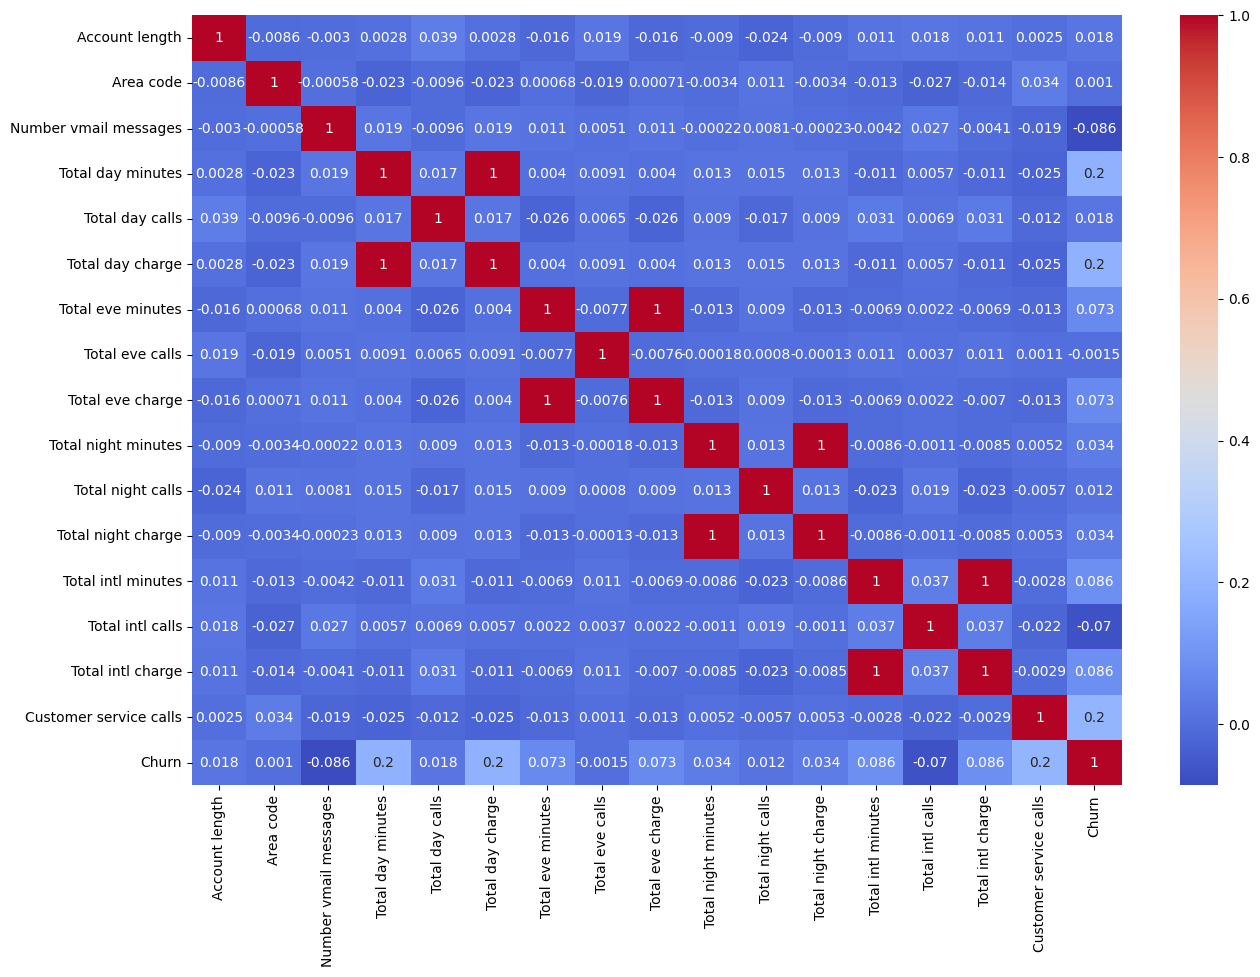

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_corr, annot=True, cmap='coolwarm')

In [17]:
# As we see in the heatmap, the
# 'Total day minutes' and 'Total day charge', 
# 'Total eve minutes' and 'Total eve charge', 
# 'Total night minutes' and 'Total night charge', 
# 'Total intl minutes' and 'Total intl charge' are correlated.
# There are 'Account length', 'Area code', and 'State' columns that we don't need to use in our model.
# So that, I will drop the selected columns.
drop_cols = ['Account length', 'Area code','Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'State']
df.drop(drop_cols, axis=1, inplace=True)

In [18]:
# In the other hand, we can see that the 'Voice mail plan' and 'International plan' columns are categorical.
# These columns may have impacted the churn rate.
# So, I will convert these columns to numeric.
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   International plan      2666 non-null   int64  
 1   Voice mail plan         2666 non-null   int64  
 2   Number vmail messages   2666 non-null   int64  
 3   Total day minutes       2666 non-null   float64
 4   Total day calls         2666 non-null   int64  
 5   Total eve minutes       2666 non-null   float64
 6   Total eve calls         2666 non-null   int64  
 7   Total night minutes     2666 non-null   float64
 8   Total night calls       2666 non-null   int64  
 9   Total intl minutes      2666 non-null   float64
 10  Total intl calls        2666 non-null   int64  
 11  Customer service calls  2666 non-null   int64  
 12  Churn                   2666 non-null   bool   
dtypes: bool(1), float64(4), int64(8)
memory usage: 252.7 KB


In [19]:
# I will check the correlation of these new columns.
new_data_corr = df.corr()
new_data_corr

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
International plan,1.000000,0.002131,0.005858,0.049550,-0.004277,0.026616,0.010277,-0.010310,0.018081,0.053162,0.011549,-0.035955,0.277489
Voice mail plan,0.002131,1.000000,0.957159,0.013438,-0.007541,0.019132,0.003404,0.001065,0.013985,-0.013963,0.015196,-0.022054,-0.099291
Number vmail messages,0.005858,0.957159,1.000000,0.019027,-0.009622,0.011401,0.005131,-0.000224,0.008124,-0.004156,0.027013,-0.018787,-0.086474
Total day minutes,0.049550,0.013438,0.019027,1.000000,0.016780,0.003999,0.009059,0.013491,0.015054,-0.011042,0.005687,-0.024543,0.195688
Total day calls,-0.004277,-0.007541,-0.009622,0.016780,1.000000,-0.026003,0.006473,0.008986,-0.016776,0.031036,0.006928,-0.011945,0.018290
Total eve minutes,0.026616,0.019132,0.011401,0.003999,-0.026003,1.000000,-0.007654,-0.013414,0.009017,-0.006915,0.002160,-0.013192,0.072906
Total eve calls,0.010277,0.003404,0.005131,0.009059,0.006473,-0.007654,1.000000,-0.000175,0.000797,0.011012,0.003710,0.001058,-0.001539
Total night minutes,-0.010310,0.001065,-0.000224,0.013491,0.008986,-0.013414,-0.000175,1.000000,0.012736,-0.008607,-0.001110,0.005236,0.033639
Total night calls,0.018081,0.013985,0.008124,0.015054,-0.016776,0.009017,0.000797,0.012736,1.000000,-0.023447,0.019367,-0.005677,0.012262
Total intl minutes,0.053162,-0.013963,-0.004156,-0.011042,0.031036,-0.006915,0.011012,-0.008607,-0.023447,1.000000,0.037315,-0.002826,0.086204


<Axes: >

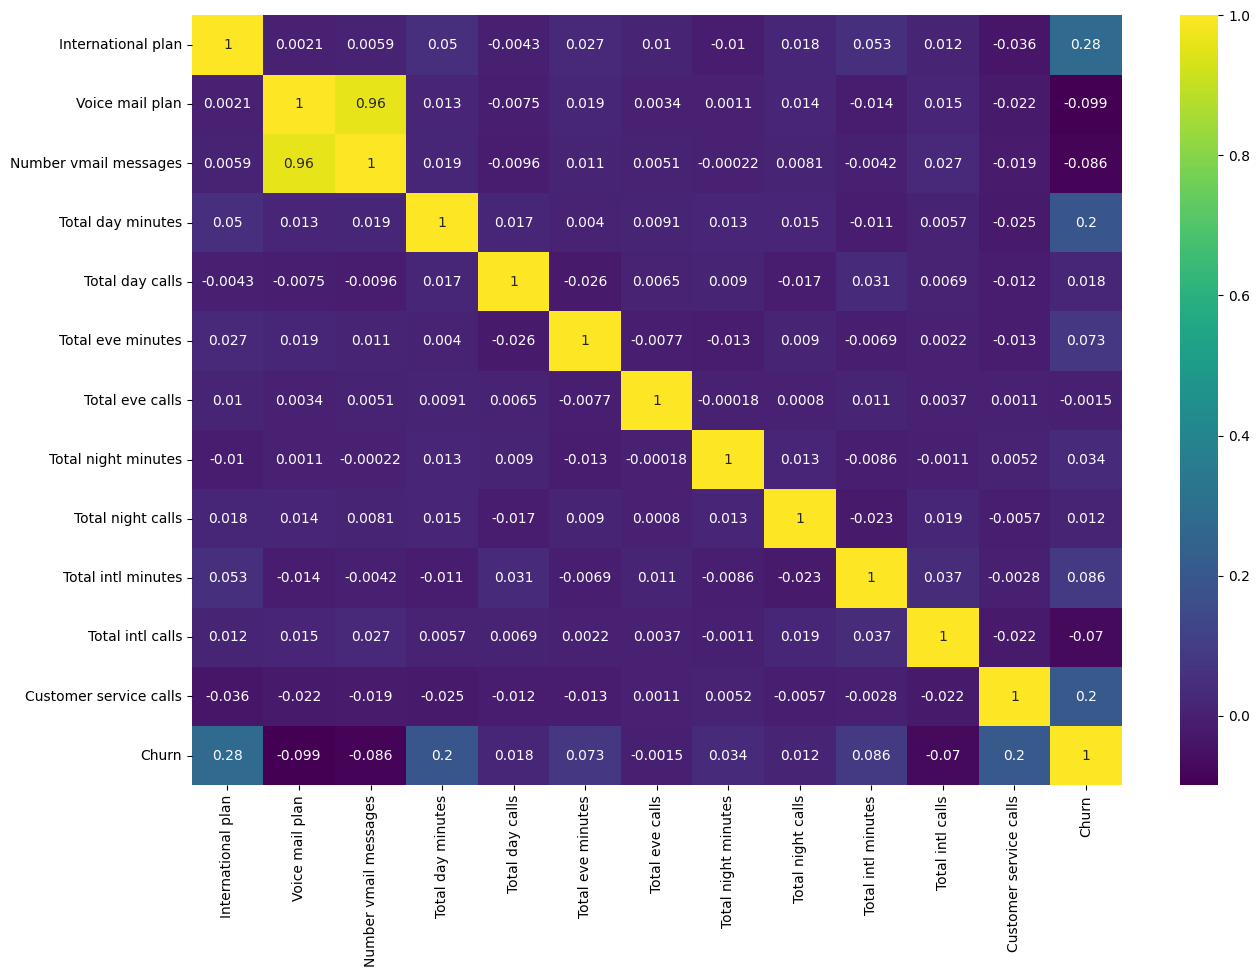

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(new_data_corr, annot=True, cmap='viridis')

array([[<Axes: title={'center': 'International plan'}>,
        <Axes: title={'center': 'Voice mail plan'}>,
        <Axes: title={'center': 'Number vmail messages'}>],
       [<Axes: title={'center': 'Total day minutes'}>,
        <Axes: title={'center': 'Total day calls'}>,
        <Axes: title={'center': 'Total eve minutes'}>],
       [<Axes: title={'center': 'Total eve calls'}>,
        <Axes: title={'center': 'Total night minutes'}>,
        <Axes: title={'center': 'Total night calls'}>],
       [<Axes: title={'center': 'Total intl minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>,
        <Axes: title={'center': 'Customer service calls'}>]], dtype=object)

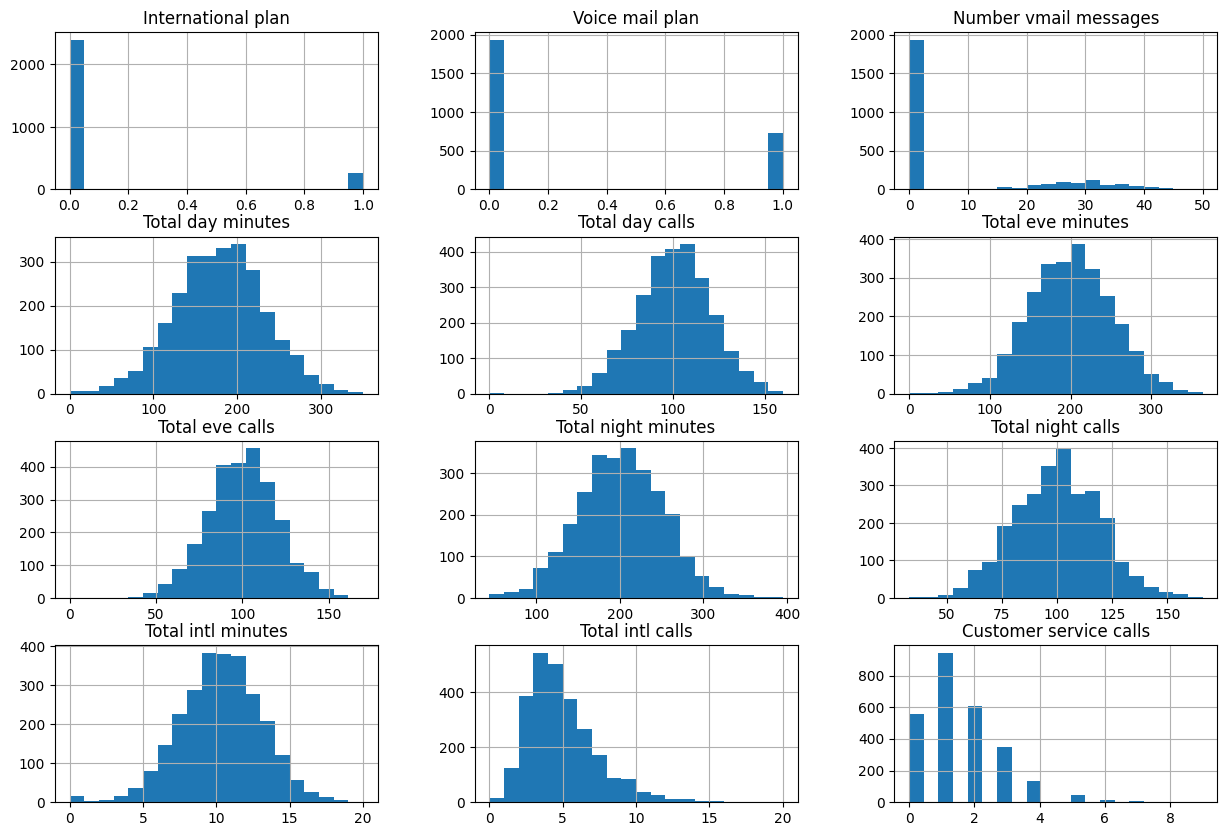

In [21]:
# I will check the distribution of the data.
df.hist(bins=20 ,figsize=(15, 10))

In [22]:
# I create a function that draw a boxplot chart.
def draw_boxplot_chart(data, column_name, color_):
    sns.boxplot(data[column_name], color=color_)
    plt.xlabel(column_name)
    plt.title(f'Boxplot of {column_name}')
    plt.show()

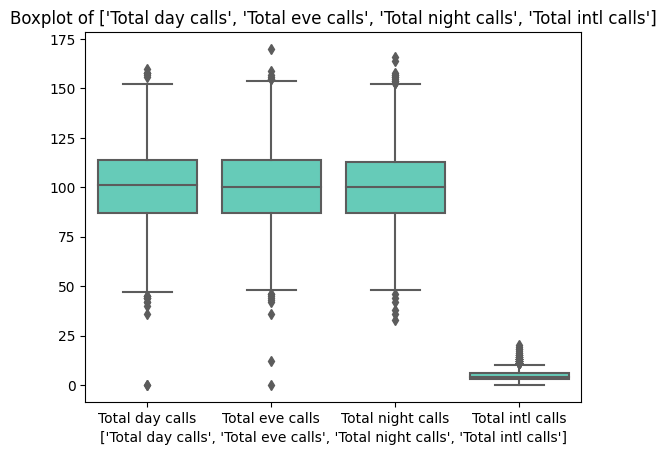

In [23]:
draw_boxplot_chart(df, ['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls'], '#55DCC3')

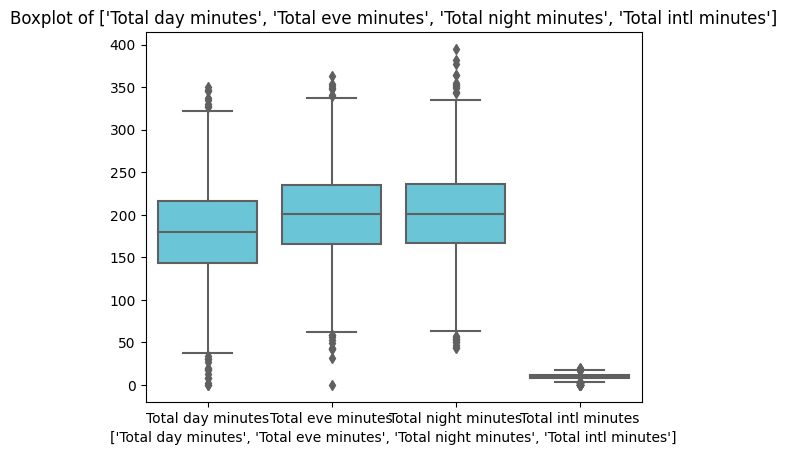

In [24]:
draw_boxplot_chart(df, ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'], '#58D1E9')

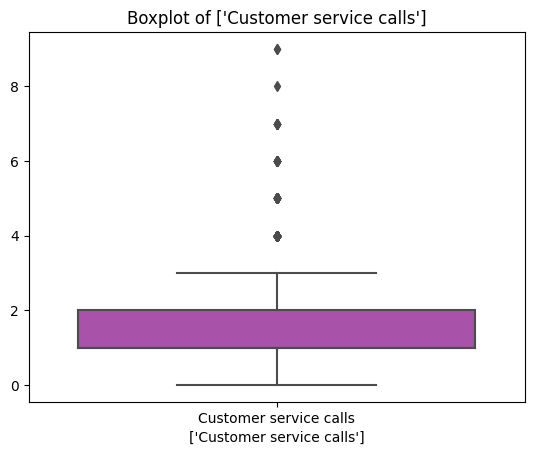

In [25]:
draw_boxplot_chart(df, ['Customer service calls'], '#B744B8')

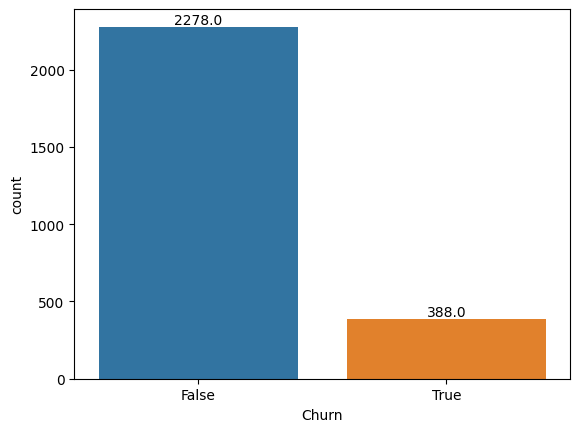

In [26]:
# I will compare the distribution of the 'Churn' column.
selected_column = 'Churn'
ax = sns.countplot(x = selected_column, data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

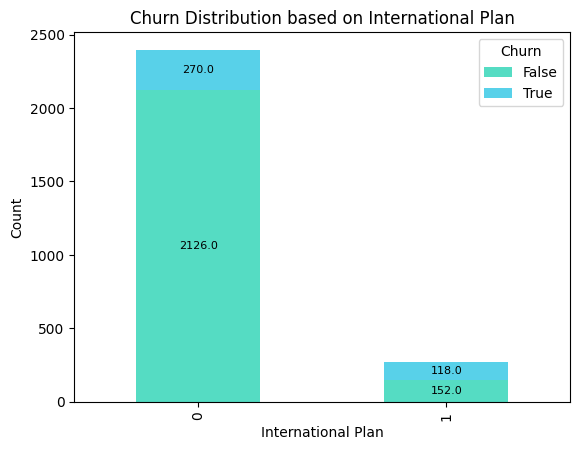

In [27]:
# Group by 'International plan' and 'Churn', then count occurrences
intl_plan_churn = df.groupby(['International plan', 'Churn']).size().unstack()

ax = intl_plan_churn.plot(kind='bar', stacked=True, color=['#55DCC3', '#58D1E9'])
plt.title('Churn Distribution based on International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['False', 'True'])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
plt.show()

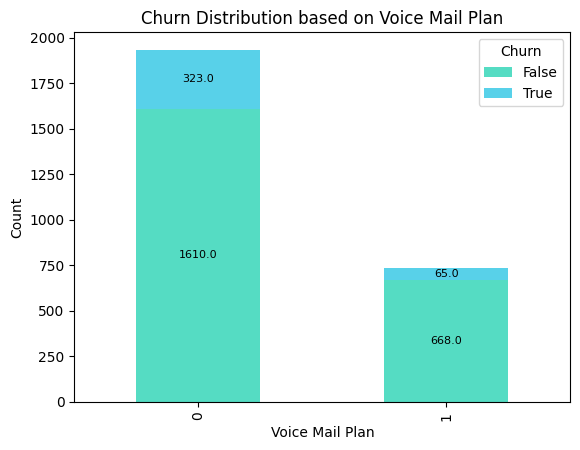

In [28]:
# Group by 'Voice mail plan' and 'Churn', then count occurrences
vm_plan_churn = df.groupby(['Voice mail plan', 'Churn']).size().unstack()

ax = vm_plan_churn.plot(kind='bar', stacked=True, color=['#55DCC3', '#58D1E9'])
plt.title('Churn Distribution based on Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['False', 'True'])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
plt.show()

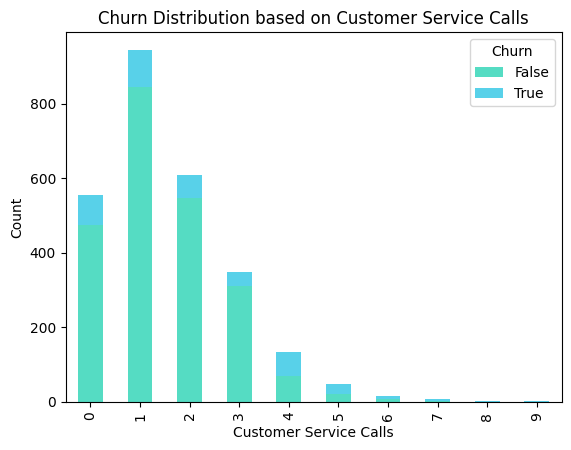

In [29]:
# Group by 'Customer service calls' and 'Churn', then count occurrences
csc_plan_churn = df.groupby(['Customer service calls', 'Churn']).size().unstack()

ax = csc_plan_churn.plot(kind='bar', stacked=True, color=['#55DCC3', '#58D1E9'])
plt.title('Churn Distribution based on Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['False', 'True'])

#for p in ax.patches:
#    width, height = p.get_width(), p.get_height()
#    x, y = p.get_xy()
#    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
plt.show()

In [30]:
### --- Machine Learning --- ###

In [31]:
# Before starting the machine learning process, I will import the test dataset and perform the data preprocessing step
# to make the test dataset ready for the machine learning process.
df_test = pd.read_csv('ChurnRate\churn-bigml-20.csv')

In [32]:
df_test.shape

(667, 20)

In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [34]:
df_test.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [35]:
# I will drop some attribute columns that we don't need for building model.
drop_cols = ['Account length', 'Area code','Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'State']
df_test.drop(drop_cols, axis= 1, inplace= True)

In [36]:
# I will show the first 5 rows of the dataset.
df_test.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,No,No,0,184.5,97,351.6,80,215.8,90,8.7,4,1,False
1,No,No,0,129.1,137,228.5,83,208.8,111,12.7,6,4,True
2,No,No,0,332.9,67,317.8,97,160.6,128,5.4,9,4,True
3,No,No,0,110.4,103,137.3,102,189.6,105,7.7,6,2,False
4,No,No,0,119.3,117,215.1,109,178.7,90,11.1,1,1,False


In [37]:
# I will convert the 'International plan' and 'Voice mail plan' into numberic.
df_test['Voice mail plan'] = df_test['Voice mail plan'].map({'Yes': 1, 'No': 0})
df_test['International plan'] = df_test['International plan'].map({'Yes': 1, 'No': 0})

In [38]:
# After the data preprocessing step, I will now choose the ML model.
# 3 ML models for this datasets are Decision tree, KNN and Logistics Regression.
# Firstly, I will build Decision tree model

In [39]:
# Decision tree
df.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [40]:
df_test.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,0,0,0,184.5,97,351.6,80,215.8,90,8.7,4,1,False
1,0,0,0,129.1,137,228.5,83,208.8,111,12.7,6,4,True
2,0,0,0,332.9,67,317.8,97,160.6,128,5.4,9,4,True
3,0,0,0,110.4,103,137.3,102,189.6,105,7.7,6,2,False
4,0,0,0,119.3,117,215.1,109,178.7,90,11.1,1,1,False


In [41]:
# I will split the data into X and y.
X_train = df.drop('Churn', axis=1) # X_train contains all feature columns except 'Churn' column
y_train = df['Churn'] # y_train is the target column 

X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']

In [42]:
# I will scale the data.
# This step helps us change the values of numeric columns in the dataset to a common scale
# without distorting differences in the ranges of values.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Build Decision tree model.
dt_model = DecisionTreeClassifier(random_state= 42)
dt_model.fit(X_train_scaled, y_train) 

# Evaluate the model.
y_pred_dt = dt_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Confusion Matrix:
 [[  0 572]
 [  0  95]]

Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       572
        True       0.14      1.00      0.25        95

    accuracy                           0.14       667
   macro avg       0.07      0.50      0.12       667
weighted avg       0.02      0.14      0.04       667



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.

In [44]:
# Build logistics regression model.
lg_model = LogisticRegression(random_state=42)
lg_model.fit(X_train_scaled, y_train)

# Evaluate the model.
y_pred_lg = lg_model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lg))

Confusion Matrix:
 [[552  20]
 [ 77  18]]

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.97      0.92       572
        True       0.47      0.19      0.27        95

    accuracy                           0.85       667
   macro avg       0.68      0.58      0.59       667
weighted avg       0.82      0.85      0.83       667



In [45]:
# Build KNN model.
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Evaluate the model.
y_pred_knn = knn_model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Confusion Matrix:
 [[564   8]
 [ 62  33]]

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.99      0.94       572
        True       0.80      0.35      0.49        95

    accuracy                           0.90       667
   macro avg       0.85      0.67      0.71       667
weighted avg       0.89      0.90      0.88       667



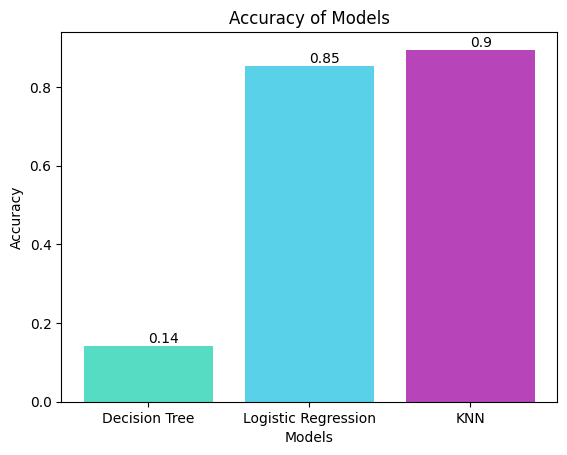

In [46]:
# I will compare the accuracy of these models.
models = ['Decision Tree', 'Logistic Regression', 'KNN']
accuracy = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_lg), accuracy_score(y_test, y_pred_knn)]
bars = plt.bar(models, accuracy, color=['#55DCC3', '#58D1E9', '#B744B8'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()


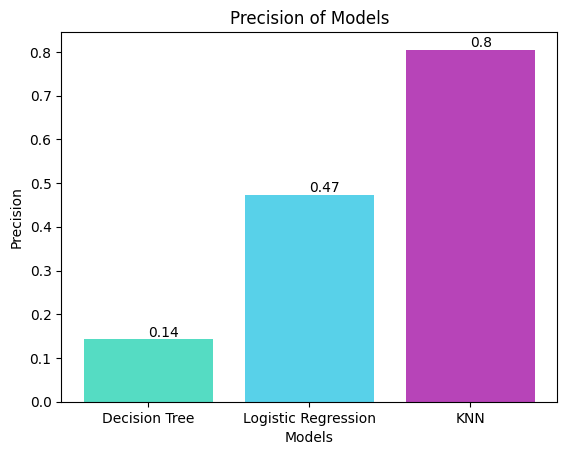

In [47]:
# I will compare the precision of these models.
models = ['Decision Tree', 'Logistic Regression', 'KNN']
precision = [precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_lg), precision_score(y_test, y_pred_knn)]
bars = plt.bar(models, precision, color=['#55DCC3', '#58D1E9', '#B744B8'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision of Models')
plt.show()

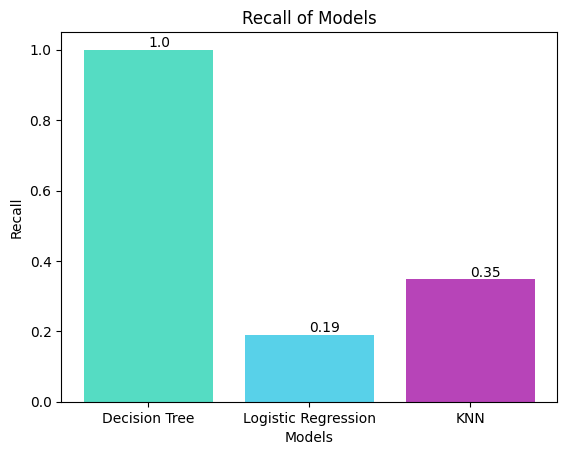

In [48]:
# I will compare the recall of these models.
models = ['Decision Tree', 'Logistic Regression', 'KNN']
recall = [recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_lg), recall_score(y_test, y_pred_knn)]
bars = plt.bar(models, recall, color=['#55DCC3', '#58D1E9', '#B744B8'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall of Models')
plt.show()